In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
ds = pd.read_csv("Social_Network_Ads.csv")

In [3]:
ds

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
# Searching for duplicates

ds.duplicated().sum()

33

In [5]:
# Remove duplicates
ds.drop_duplicates(inplace = True)

In [6]:
ds.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [7]:
# Spliting as Independent and Dependent Variables

x = ds[['Age','EstimatedSalary']]
y = ds[['Purchased']]

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


In [10]:
# model selection and model fitting with train test data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state = 0)

In [14]:
# Applyig decision tree algorithm 
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier (criterion = 'entropy' ,random_state = 0)
cls.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [16]:
x_test

,Age,EstimatedSalary
111,37,71000
277,49,88000
46,25,79000
27,47,30000
81,39,42000
...,...,...
215,60,108000
287,48,138000
300,58,38000
308,36,125000


In [17]:
y_test

,Purchased
111,0
277,1
46,0
27,1
81,0
...,...
215,1
287,1
300,1
308,1


In [18]:
#predict for my input 
result = cls.predict(sc.transform([[30, 150000]]))
result

array([0], dtype=int64)

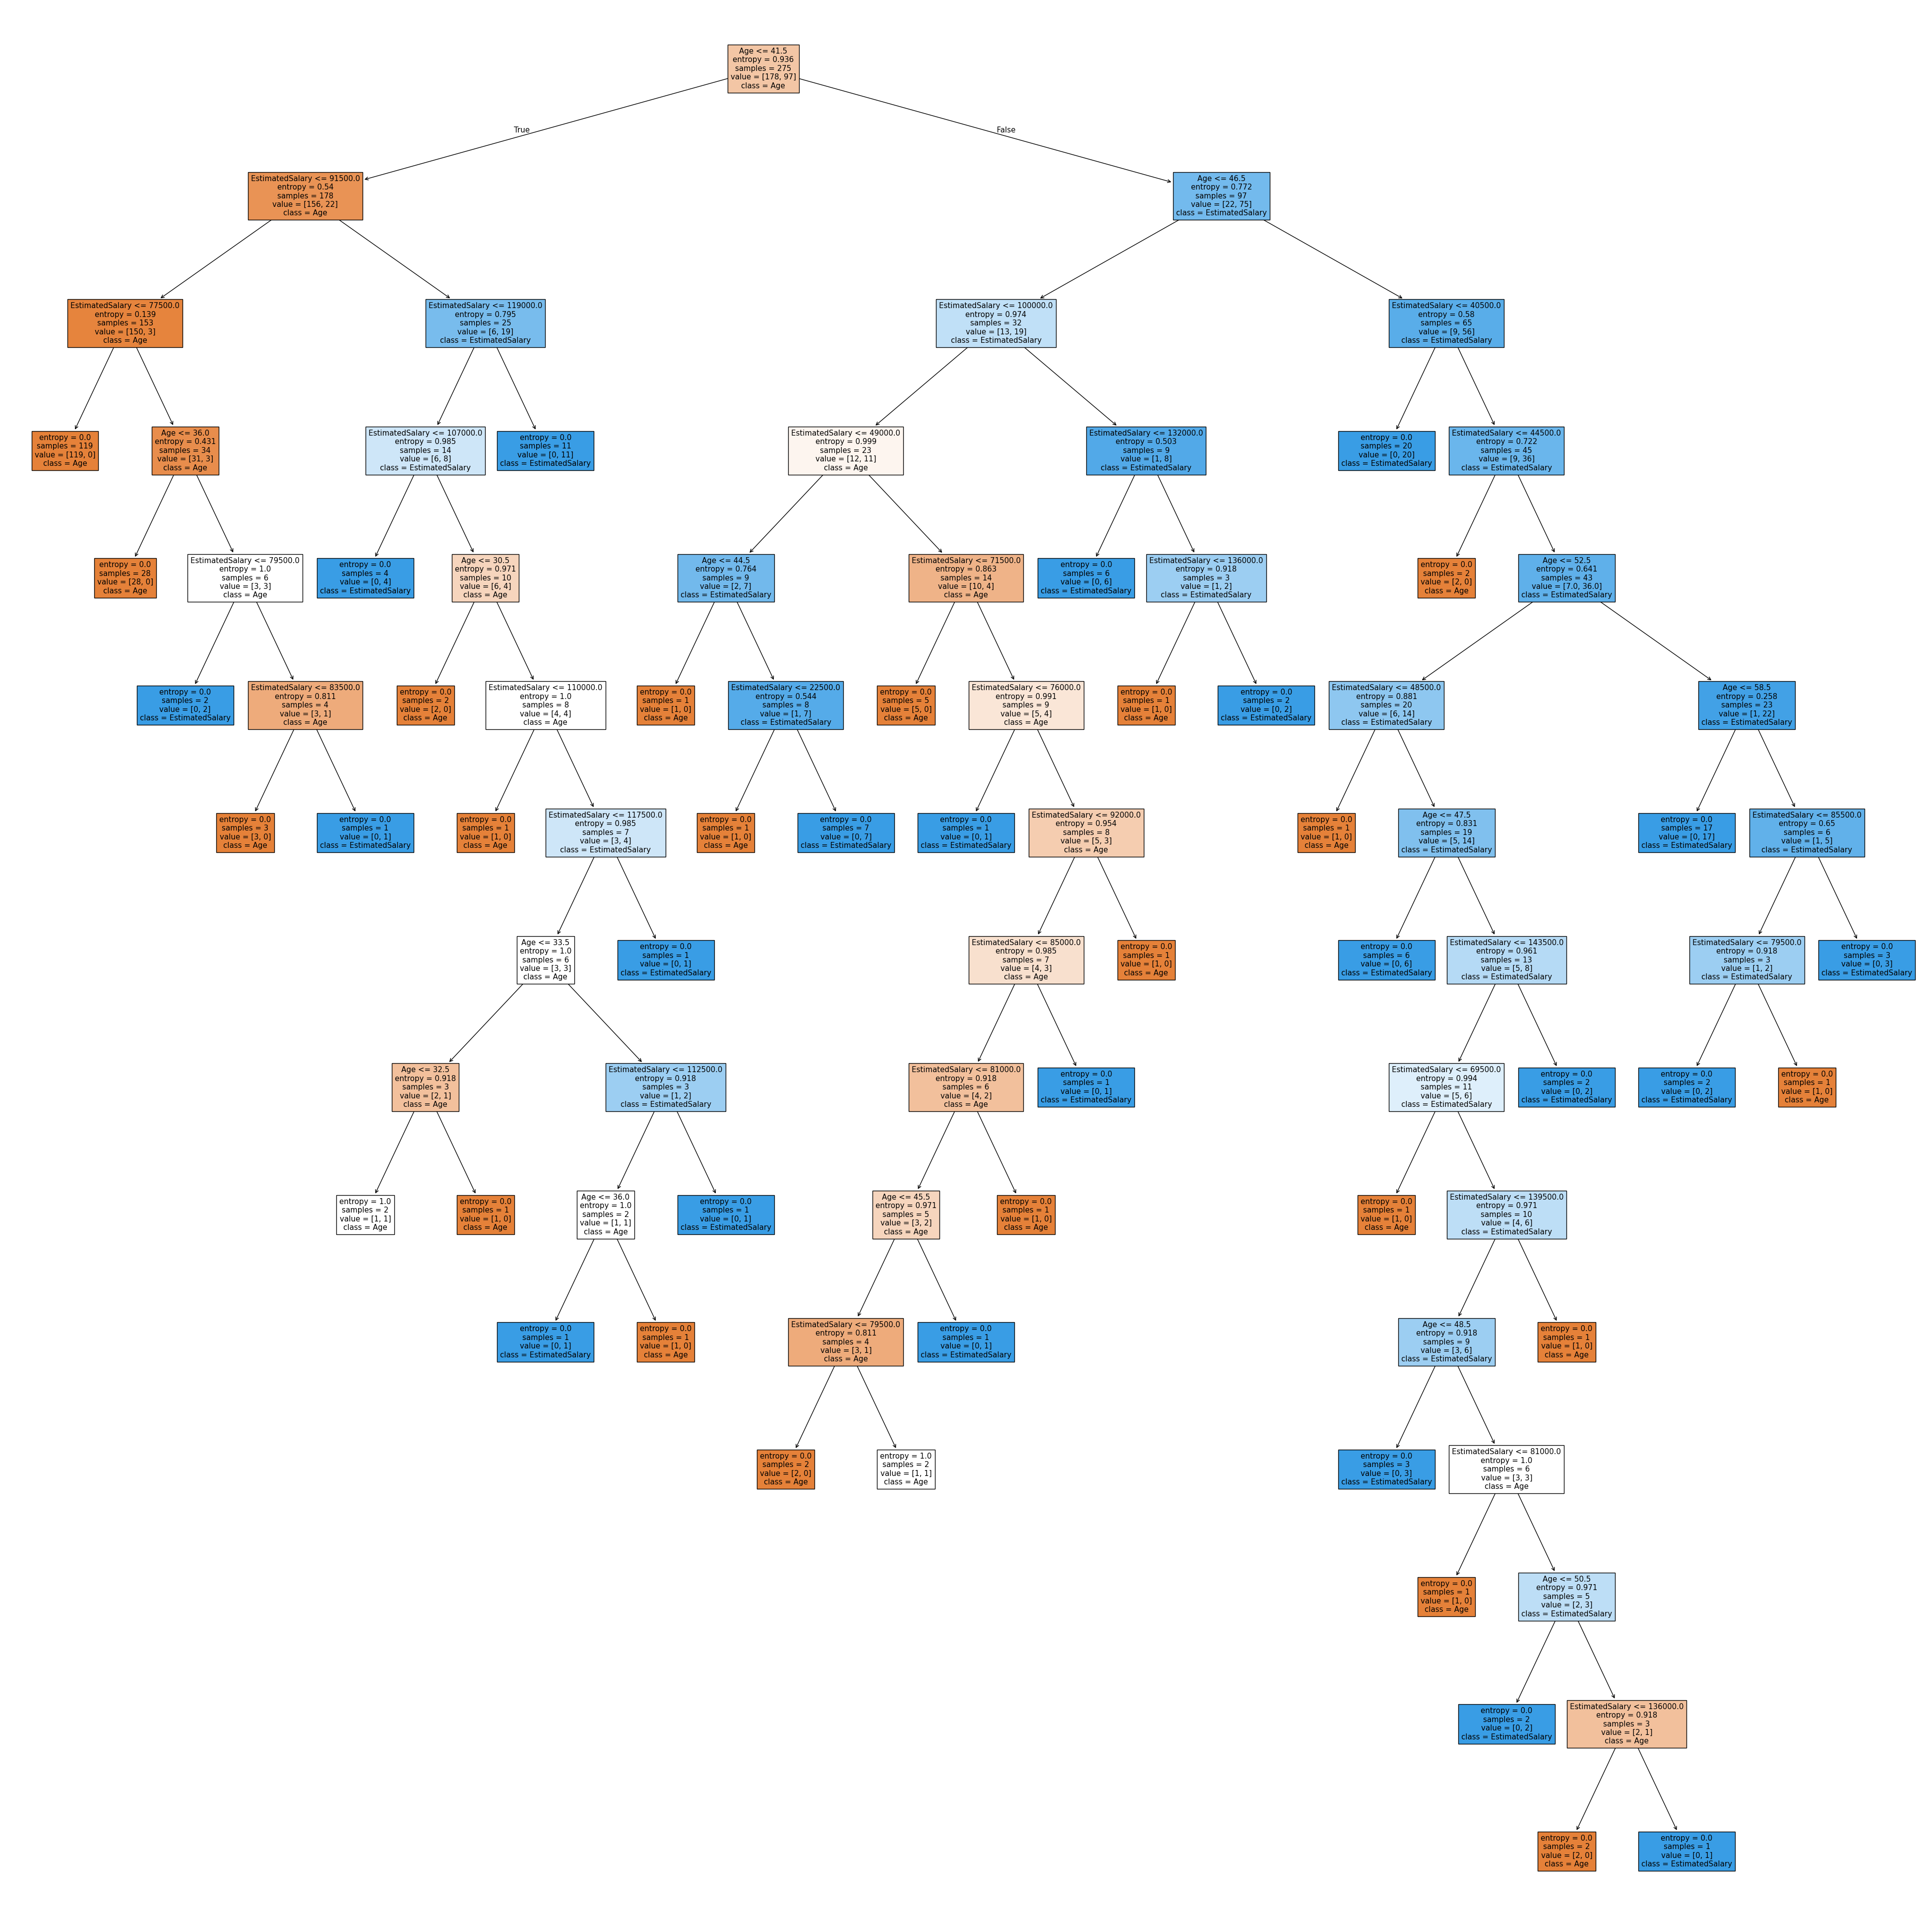

In [20]:
# Plot for decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(50,50))
plot_tree(cls,filled = True,feature_names = ['Age','EstimatedSalary'],class_names =['Age','EstimatedSalary'] )
plt.show()

In [23]:
#Checking Accuracy  of logistic regression model
from sklearn.metrics import accuracy_score

# predict on the test set
y_pred = cls.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy of the logistic regression model: {accuracy* 100:.2f}%")

Accuracy of the logistic regression model: 82.61%


In [24]:
# user Input
age = float(input("Enter Age :"))
salary = float(input("Enter Estimated Salary :"))

myinput = pd.DataFrame(sc.transform([[age,salary]]),columns = ['Age','EstimatedSalary'])

result = cls.predict(myinput)

if result[0]==1:
    print("Prediction: User will purchase plan")
else:
    print("Prediction: User will not purchase plan")

Enter Age : 45
Enter Estimated Salary : 50000


Prediction: User will not purchase plan
